# Standardize Data - Generalized for Years

In [6]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns

os.chdir('C:/Users/jreyna/Documents/Projects/cmi-pb-multiomics/third_challenge')
outdir = 'results/main/cmi_pb_datasets/processed/training_data/'
os.makedirs(outdir, exist_ok=True)

IgG1 and IgG4 day 14 and day 0 values for PT, FHA, and Pertactin

In [7]:
# setting a list of assays
assays = ('plasma_cytokine_concentration', 'pbmc_cell_frequency', 'plasma_ab_titer', 'pbmc_gene_expression')

## Load the datasets

In [8]:
training_years = [2020, 2021]
datasets = {'plasma_cytokine_concentration': None,
            'pbmc_cell_frequency': None,
            'plasma_ab_titer': None,
            'pbmc_gene_expression': None}

#for assay in assays:
assay = 'plasma_cytokine_concentration'
input_fn = os.path.join(outdir, '{}.training-data.tsv'.format(assay))
cytokine_df = pd.read_table(input_fn)


In [22]:
cytokine_df.head()

,subject_id,O14625,O43508,P01133,P01579,P02778,P05231,P09603,P10145,P10147,...,P39900,P48061,P50591,P51671,P80075,P80098,Q07325,Q14116,Q99616,Q99731
0,4,10.23940,9.25482,8.95158,NaN,7.76769,3.50762,7.73160,7.27428,5.74182,...,4.20552,NaN,7.67899,8.90560,7.25813,2.34641,6.69559,8.45333,10.20229,11.48567
1,6,10.34610,8.65030,9.37102,NaN,8.10277,2.60569,7.79679,6.73318,5.46230,...,7.12163,NaN,7.23745,9.12917,8.09582,3.78857,6.99032,9.10157,12.90550,9.68797
2,11,9.54684,8.05783,9.45854,NaN,6.46027,4.25658,7.10567,5.85119,4.51614,...,4.54453,NaN,6.29055,8.61154,7.66439,2.73679,6.00854,8.48368,10.45748,8.01463
3,15,9.93890,8.44636,9.68254,NaN,7.96844,2.64932,7.67979,5.99654,5.35754,...,4.96235,NaN,7.52991,9.12795,8.13013,3.14737,6.64271,8.55071,9.33060,8.96633
4,17,11.17246,8.87038,9.99899,NaN,8.03876,3.36796,8.03765,7.88393,5.77254,...,5.50668,1.17249,7.66303,9.11674,7.73682,3.36224,6.95663,8.92963,11.12268,10.09815


In [25]:
cytokine_plot_df = cytokine_df.loc[:, cytokine_df.isna().sum(axis=0) == 0]
cytokine_plot_df.set_index('subject_id', inplace=True)

<Axes: ylabel='subject_id'>

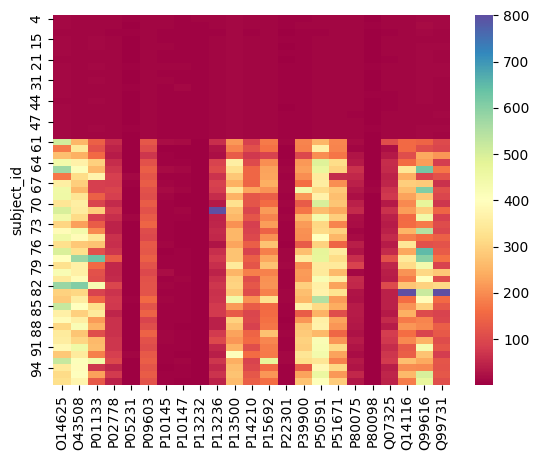

In [27]:
sns.heatmap(cytokine_plot_df, cmap=sns.color_palette("Spectral", as_cmap=True), vmax=800)

In [28]:
cytokine_plot_df

,O14625,O43508,P01133,P02778,P05231,P09603,P10145,P10147,P13232,P13236,...,P22301,P39900,P50591,P51671,P80075,P80098,Q07325,Q14116,Q99616,Q99731
subject_id,,,,,,,,,,,,,,,,,,,,,
4,10.23940,9.25482,8.95158,7.76769,3.50762,7.73160,7.27428,5.74182,7.35730,7.75563,...,3.47677,4.20552,7.67899,8.90560,7.25813,2.34641,6.69559,8.45333,10.20229,11.48567
6,10.34610,8.65030,9.37102,8.10277,2.60569,7.79679,6.73318,5.46230,3.53769,7.19692,...,4.15272,7.12163,7.23745,9.12917,8.09582,3.78857,6.99032,9.10157,12.90550,9.68797
11,9.54684,8.05783,9.45854,6.46027,4.25658,7.10567,5.85119,4.51614,3.95864,6.41940,...,3.34559,4.54453,6.29055,8.61154,7.66439,2.73679,6.00854,8.48368,10.45748,8.01463
15,9.93890,8.44636,9.68254,7.96844,2.64932,7.67979,5.99654,5.35754,3.79068,7.41106,...,4.03578,4.96235,7.52991,9.12795,8.13013,3.14737,6.64271,8.55071,9.33060,8.96633
17,11.17246,8.87038,9.99899,8.03876,3.36796,8.03765,7.88393,5.77254,3.73671,7.26419,...,3.35656,5.50668,7.66303,9.11674,7.73682,3.36224,6.95663,8.92963,11.12268,10.09815
20,10.43840,8.85011,8.66343,7.18416,2.67175,7.73569,4.97702,5.36385,3.39323,7.31207,...,4.34676,4.93213,7.42229,9.17883,7.63825,2.87959,6.91443,9.27548,10.67945,9.00289
21,9.47875,9.00422,9.28228,6.86485,2.21544,7.71481,5.70083,5.22709,4.55338,7.04865,...,3.17308,5.11631,7.83020,8.95975,7.85357,2.58453,6.30490,8.73583,10.01321,9.06877
26,10.76186,9.00696,9.64757,8.45705,3.81686,7.98762,7.01523,6.72337,3.89587,8.14500,...,3.54412,5.39918,7.47762,8.62489,8.97156,4.07244,6.56540,8.44038,11.47662,12.18686
29,10.93579,9.48701,9.60908,7.59442,2.74276,7.88201,6.26062,5.76662,3.64770,7.58817,...,3.93366,6.19151,7.64820,9.08502,7.90850,2.84101,7.30653,8.82182,11.84018,10.14960
